In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df: pd.DataFrame = pd.read_csv("./data/processed_trainv3.csv")

In [3]:
df.head()
# df["TAXI_ID"].unique()

,ORIGIN_CALL,ORIGIN_STAND,TAXI_ID,A,B,C,YEAR,WK_OF_YR,WK_DAY,QTR_HR,TARGET
0,0,58,241,0,1,0,0,44,0,21,945
1,0,11,75,0,1,0,1,24,6,5,465
2,0,57,191,0,1,0,0,30,2,68,675
3,0,15,274,0,1,0,0,32,5,20,195
4,0,12,234,0,1,0,0,28,2,29,345


In [4]:
len(df)

1493353

In [11]:
mean, std = df["TARGET"].mean(), df["TARGET"].std()

In [12]:
std

445.93603949743965

(array([    0.,     0.,     0.,  4154.,  3181.,  3064.,  2629.,  2972.,
         3195.,  3907.,  4582.,  5843.,  7022.,  8889., 10236., 12042.,
        13515., 15481., 17268., 19132., 20498., 21971., 23143., 24587.,
        25258., 26549., 26924., 27536., 27876., 28228., 28232., 29280.,
        29373., 29563., 29484., 29756., 28986., 29257., 28703., 28296.,
        27861., 27278., 26600., 26489., 25729., 25190., 24430., 23975.,
        23266., 22778., 22042., 21380., 20891., 19979., 19527., 18878.,
        18289., 17573., 16684., 16085., 15570., 14997., 14297., 13667.,
        13183., 12425., 12066., 11430., 10866., 10378.,  9956.,  9442.,
         8948.,  8569.,  8136.,  7686.,  7442.,  7034.,  6733.,  6399.,
         6193.,  5748.,  5530.,  5288.,  4868.,  4959.,  4641.,  4392.,
         4146.,  3992.,  3791.,  3606.,  3424.,  3384.,  3128.,  3059.,
         2857.,  2715.,  2640.,  2560.,  2515.,  2379.,  2307.,  2115.,
         2090.,  2108.,  1963.,  1816.,  1754.,  1682.,  1632., 

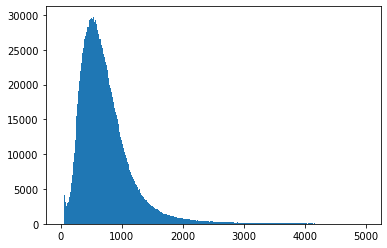

In [13]:
%matplotlib inline
plt.hist(df["TARGET"],bins=np.arange(start=0, stop=5000, step=15))

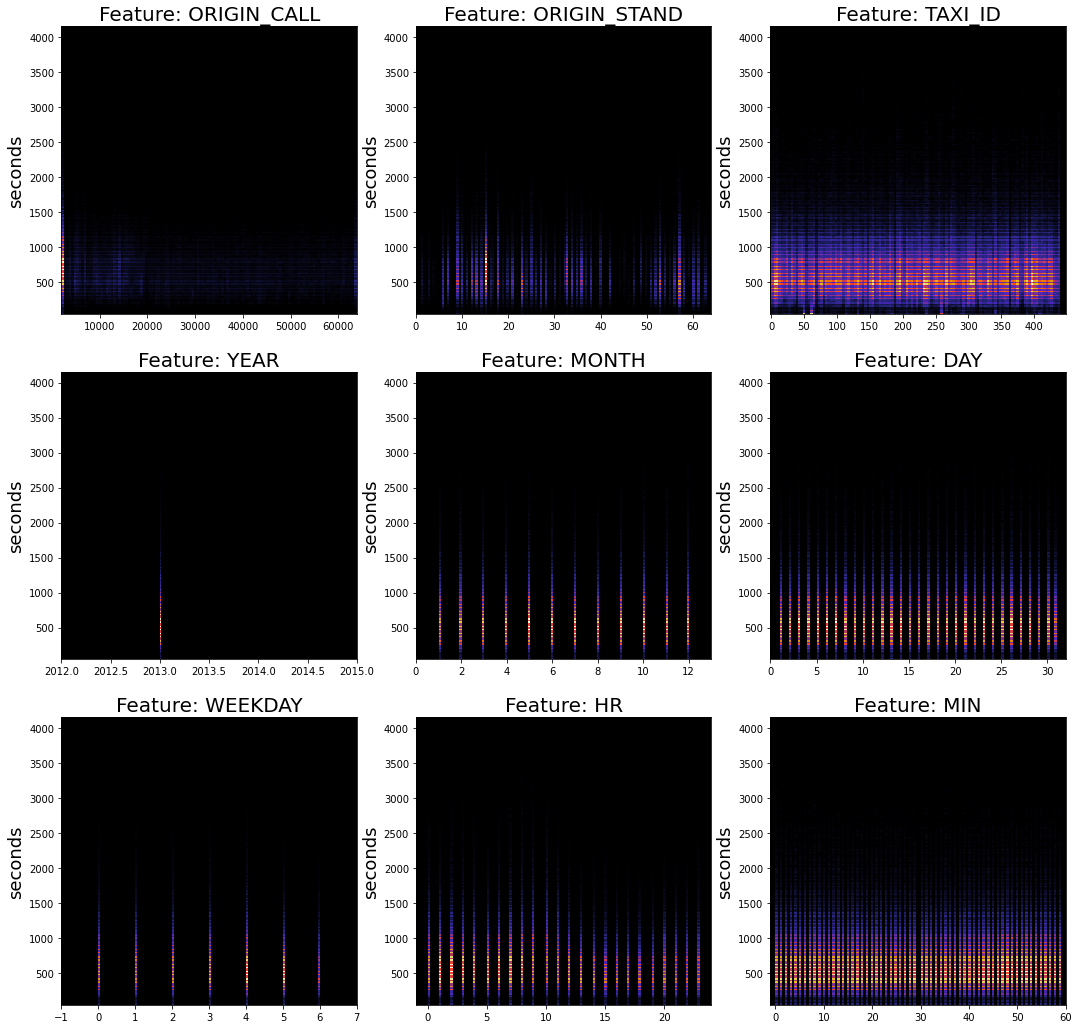

In [19]:
%matplotlib inline
buckets = (int(mean + 5 * std) // 15)
fig, axs = plt.subplots(3, 3, figsize=(18, 18))

for idx, v in enumerate(["ORIGIN_CALL", "ORIGIN_STAND", "TAXI_ID", "YEAR", "MONTH", "DAY", "WEEKDAY", "HR", "MIN"]):
    ax: plt.Axes = axs[idx // 3, idx % 3]
    if "ORIGIN_" in v:
        ax.hist2d(df[df[v] != 0][v][:-1], df[df[v] != 0]["TARGET"][:-1], cmap="CMRmap", bins=(120, buckets))
    else:
        ax.hist2d(df[v][:-1], df["TARGET"][:-1], cmap="CMRmap", bins=(120, buckets))

    ax.set_xlim(ax.get_xlim()[0] - 1, ax.get_xlim()[1] + 1)
    ax.set_facecolor("black")
    ax.set_ylabel("seconds", fontsize=18)
    ax.set_title(f"Feature: {v}", fontsize=20)

plt.show()

<BarContainer object of 12 artists>

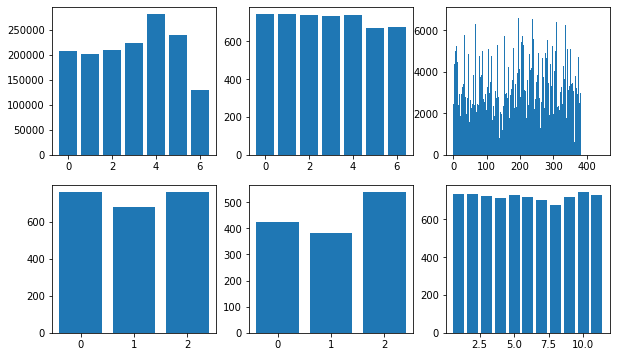

In [53]:
%matplotlib inline
plt.figure(figsize=(10,6))
plt.subplot(2, 3, 1)
plt.bar(range(0, 7), [len(df[df["WEEKDAY"] == i]) for i in range(7)])
plt.subplot(2, 3, 2)
plt.bar(range(0, 7), [df[df["WEEKDAY"] == i]["TARGET"].mean() for i in range(7)])
plt.subplot(2, 3, 3)
plt.bar(range(0, 448), [len(df[df["TAXI_ID"] == i]["TARGET"]) for i in range(448)])
plt.subplot(2, 3, 4)
plt.bar(range(3), [df[df["A"] == 1]["TARGET"].mean(), df[df["B"] == 1]["TARGET"].mean(), df[df["C"] == 1]["TARGET"].mean()])
plt.subplot(2, 3, 5)
plt.bar(range(3), [df[df["A"] == 1]["TARGET"].std(), df[df["B"] == 1]["TARGET"].std(), df[df["C"] == 1]["TARGET"].std()])
plt.subplot(2, 3, 6)
plt.bar(range(0, 12), [df[df["MONTH"] == i]["TARGET"].mean() for i in range(12)])

In [15]:
df["ORIGIN_CALL"][:-1]

0              0.0
1          37007.0
2              0.0
3              0.0
4              0.0
            ...   
1493347        0.0
1493348        0.0
1493349        0.0
1493350        0.0
1493351    18793.0
Name: ORIGIN_CALL, Length: 1493352, dtype: float64

In [16]:
df.to_csv("data/processed_trainv3.csv", index=False)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1493353 entries, 0 to 1493352
Data columns (total 13 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   ORIGIN_CALL   1493353 non-null  float64
 1   ORIGIN_STAND  1493353 non-null  int64  
 2   TAXI_ID       1493353 non-null  int64  
 3   A             1493353 non-null  int64  
 4   B             1493353 non-null  int64  
 5   C             1493353 non-null  int64  
 6   YEAR          1493353 non-null  int64  
 7   MONTH         1493353 non-null  int64  
 8   DAY           1493353 non-null  int64  
 9   WEEKDAY       1493353 non-null  int64  
 10  HR            1493353 non-null  int64  
 11  MIN           1493353 non-null  int64  
 12  TARGET        1493353 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 148.1 MB
